In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats

warnings.filterwarnings('ignore')


loading dataset

In [2]:
conn = sqlite3.connect('inventory.db')

df = pd.read_sql_query("select * from vendor_sales_summary" , conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,5.101920e+06,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,4.819073e+06,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,4.538121e+06,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,4.475973e+06,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,4.223108e+06,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


now goining to analyse distribution of each column , understand anomalies 

In [3]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.000000,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,58.000000,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,24.385303,109.269375,0.360000,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,35.643671,148.246016,0.490000,10.990000,15.990000,28.990000,7.499990e+03
TotalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.000000,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,30106.693372,123067.799627,0.710000,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesDollars,10514.0,42954.173834,168977.755843,1.980000,809.820000,5599.700000,29524.250000,5.101920e+06
TotalSalesPrice,10514.0,19111.958773,45264.605387,0.990000,334.890000,3020.085000,16442.477500,6.728193e+05
TotalSalesQuantity,10514.0,3129.583317,11037.801407,1.000000,36.000000,280.000000,1985.000000,3.349390e+05
TotalExciseTax,10514.0,1804.263569,11065.659557,0.060000,5.382500,50.425000,436.730000,3.682428e+05


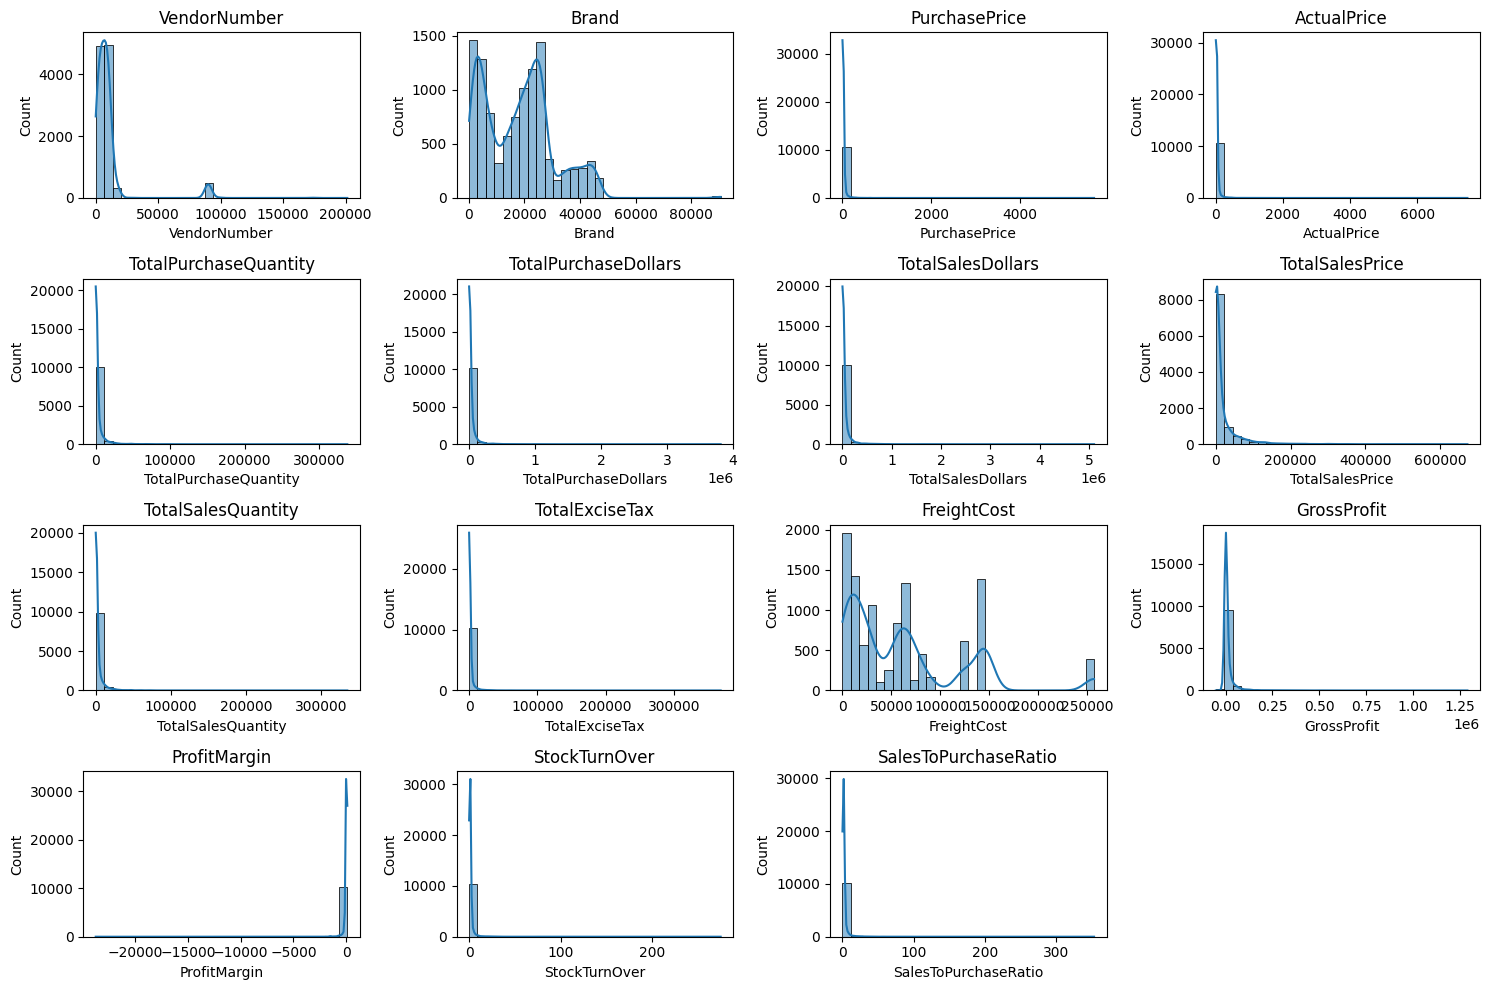

In [5]:
#distribution plots for numerical value

numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize= (15, 10))

for i , col in enumerate(numerical_cols):
    plt.subplot(4 , 4 , i+1 )
    sns.histplot(df[col] , kde =True , bins= 30)
    plt.title(col)
plt.tight_layout()
plt.show()


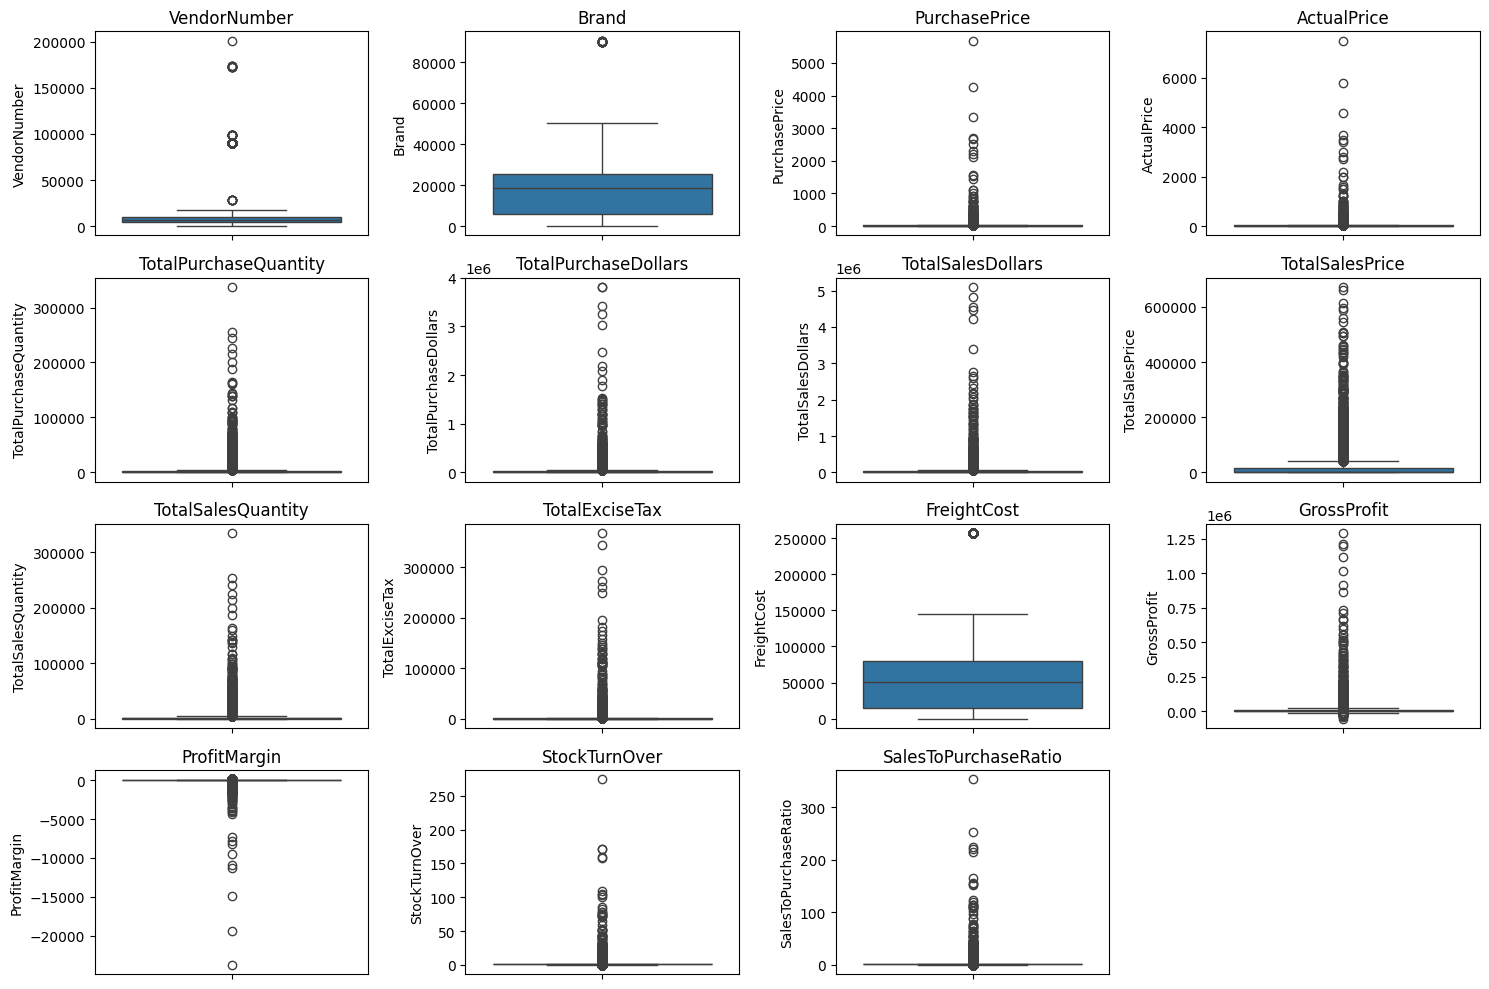

In [4]:
#Outlier detection

numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize= (15, 10))

for i , col in enumerate(numerical_cols):
    plt.subplot(4 , 4 , i+1 )
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


Negative & Zero Values:
* Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.
* Profit Margin: Has a minimum of-00, which suggests cases where revenue is zero or even lower than costs.
* Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

Outliers Indicated by High Standard Deviations:
* Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
* Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
* Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [5]:
# filtering data by removing inconsistencies 

df = pd.read_sql_query("""select * 
from vendor_sales_summary
where GrossProfit > 0 
AND ProfitMargin > 0 
AND TotalSalesQuantity >0

""" , conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,5.101920e+06,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,4.819073e+06,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,4.538121e+06,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,4.475973e+06,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,4.223108e+06,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,1.595000e+01,10.96,5.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,6.566000e+01,1.47,134.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,1.980000e+00,0.99,2.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,1.432800e+02,77.61,72.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388


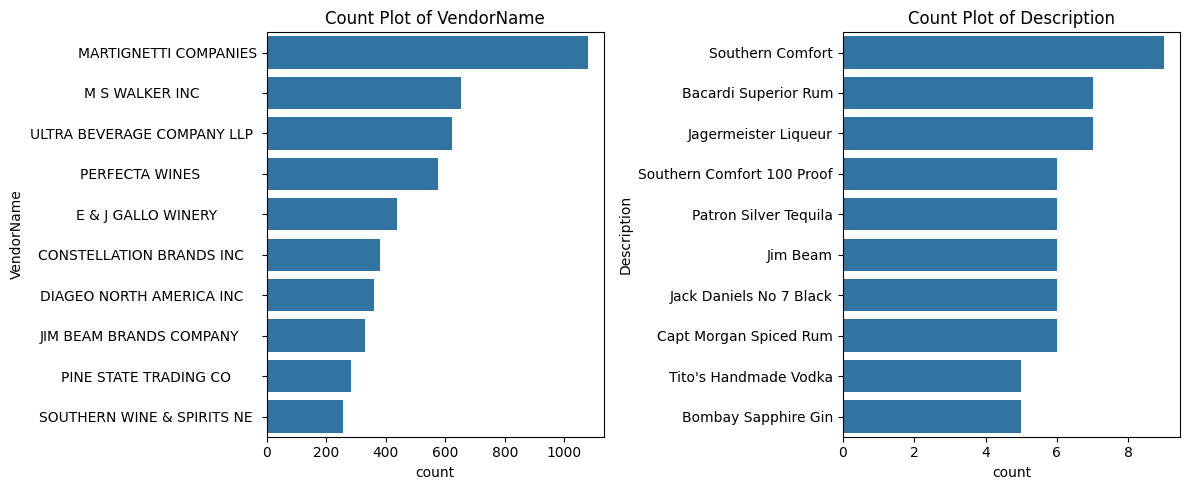

In [6]:
#count plots for catagorical colums 

catagorical_cols = ["VendorName" , "Description"]

plt.figure(figsize=(12 , 5 ))

for i , col in enumerate(catagorical_cols):
    plt.subplot(1 , 2 , i+1)
    sns.countplot(y=df[col] , order = df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()


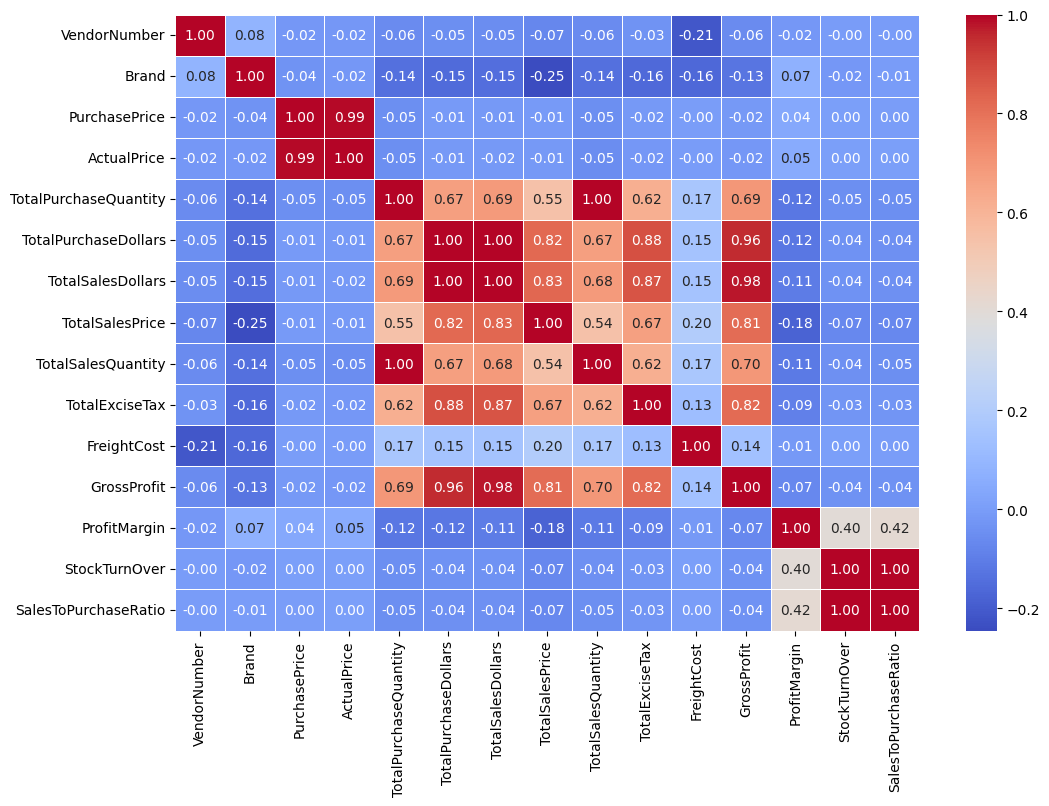

In [7]:
#corelation heat map
plt.figure(figsize=(12,8))
correlation_matrix= df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f" , cmap="coolwarm" , linewidths=0.5)
plt.show()

# Correlation Insights
* Purchase Price has weak correlations with TotalSales Dollars (-0.012) and Gross Profit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
* Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.
* Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
* Stock Turnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

# data analysis 
Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins. what it means

In [10]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [11]:
low_sales_thershold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_thershold = brand_performance['ProfitMargin'].quantile(0.85)
print(low_sales_thershold)
print(high_margin_thershold)


560.299
64.97017552750111


In [12]:
#sales with high profit low sales
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_thershold)&
    (brand_performance['ProfitMargin']>= high_margin_thershold)
    
]
display(target_brands.sort_values('TotalSalesDollars'))

,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


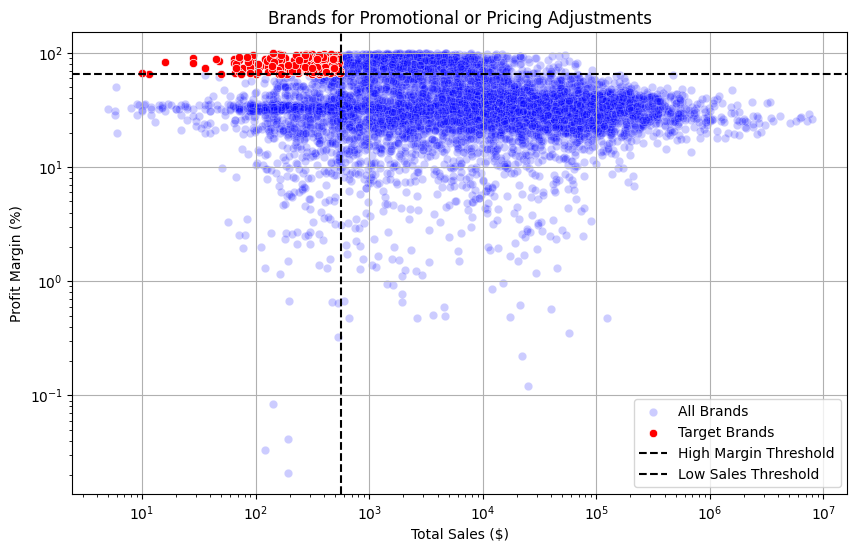

In [13]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_thershold, linestyle='--', color='black', label='High Margin Threshold')
plt.axvline(low_sales_thershold, linestyle='--', color='black', label='Low Sales Threshold')

plt.xscale('log')  
plt.yscale('log')

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()


# vendors and brands showing highest sales performance

In [14]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [15]:
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors
# print(top_brands)

VendorName
DIAGEO NORTH AMERICA INC       6.799010e+07
MARTIGNETTI COMPANIES          3.927640e+07
PERNOD RICARD USA              3.206320e+07
JIM BEAM BRANDS COMPANY        3.142302e+07
BACARDI USA INC                2.485482e+07
CONSTELLATION BRANDS INC       2.421875e+07
E & J GALLO WINERY             1.839990e+07
BROWN-FORMAN CORP              1.824723e+07
ULTRA BEVERAGE COMPANY LLP     1.650254e+07
M S WALKER INC                 1.470646e+07
Name: TotalSalesDollars, dtype: float64

In [16]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [17]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

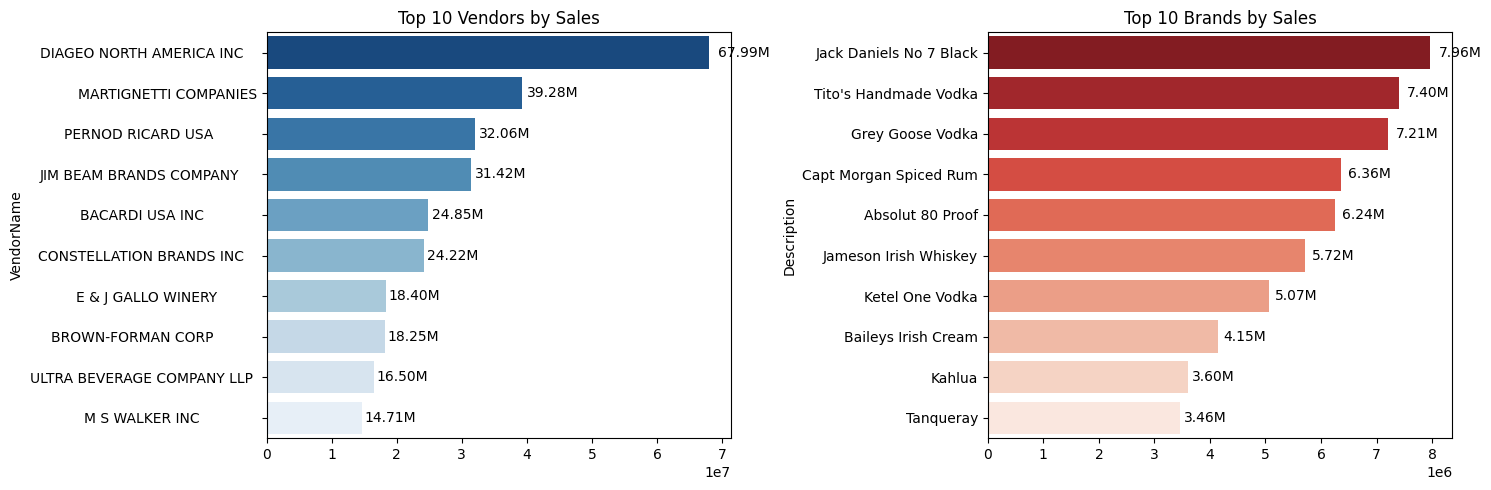

In [18]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')
plt.tight_layout()
plt.show()

In [19]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesDollars', 'TotalSalesPrice',
       'TotalSalesQuantity', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnOver', 'SalesToPurchaseRatio'],
      dtype='object')

# whic vendors contribute to most total purchase 

In [20]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit' : 'sum',
    'TotalSalesDollars' : 'sum'
}).reset_index()


In [21]:
vendor_performance['PurchaseContribution%'] = (vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum())*100

In [22]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending = False), 2)

In [23]:
# display top 10 vendors 
top_vendors = vendor_performance.head(10)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors



,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.46M,13.81M,39.28M,8.29
69,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
107,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [24]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.46M,13.81M,39.28M,8.29,24.59
69,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.35
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,39.99
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.66
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.63
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.94
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.87
107,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.50
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.68


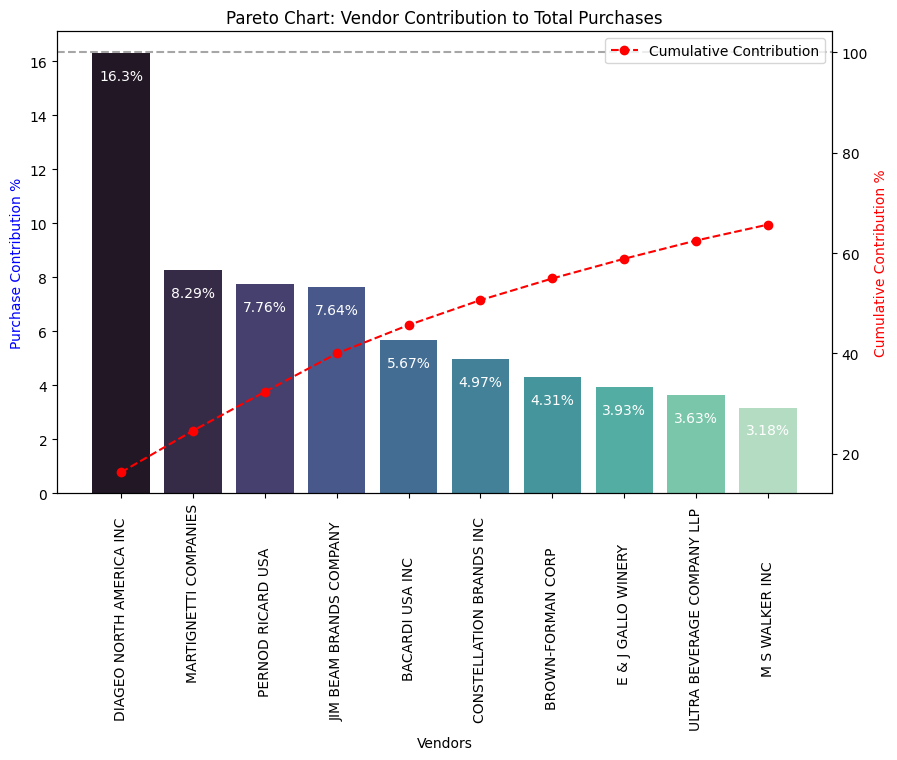

In [25]:

fig, ax1 = plt.subplots(figsize = (10 , 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value) + '%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative Contribution')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()


 how much total procurement is dependent on top vendors

In [26]:
print(f"total purchase contribution of 10 top vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")

total purchase contribution of 10 top vendors is 65.68 %


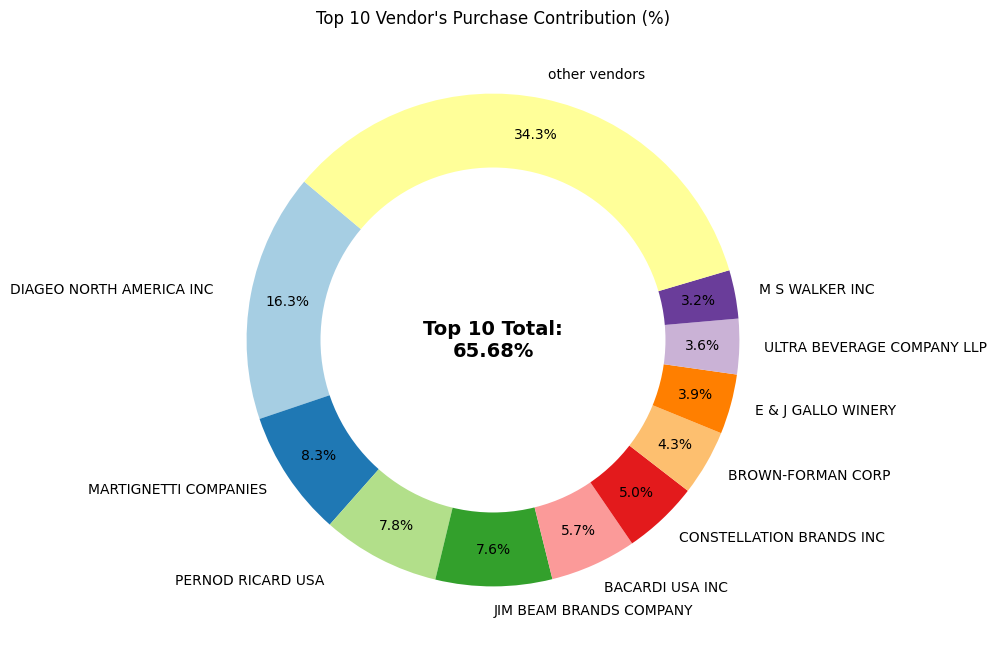

In [27]:
vendors = list(top_vendors['VendorName'].values)
purchase_contribution = list(top_vendors['PurchaseContribution%'].values)
total_contribution= sum(purchase_contribution)
remaining_contribution = 100 - total_contribution

vendors.append("other vendors")
purchase_contribution.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contribution, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show() 

does purchasing in bulk reduce unit price and what is optimal purchase volumne

In [28]:
df['UnitPurchasePrice']= df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,5.101920e+06,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,4.819073e+06,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,4.538121e+06,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,4.475973e+06,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,4.223108e+06,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,1.595000e+01,10.96,5.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,6.566000e+01,1.47,134.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,1.980000e+00,0.99,2.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,1.432800e+02,77.61,72.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47


In [29]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'] , q=3 , labels=['Small' , 'Medium' , 'Large'])

In [30]:
df[['OrderSize' , 'TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8560,Small,2
8561,Small,6
8562,Small,2
8563,Small,1


In [31]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.057543
Medium,15.486414
Large,10.777625


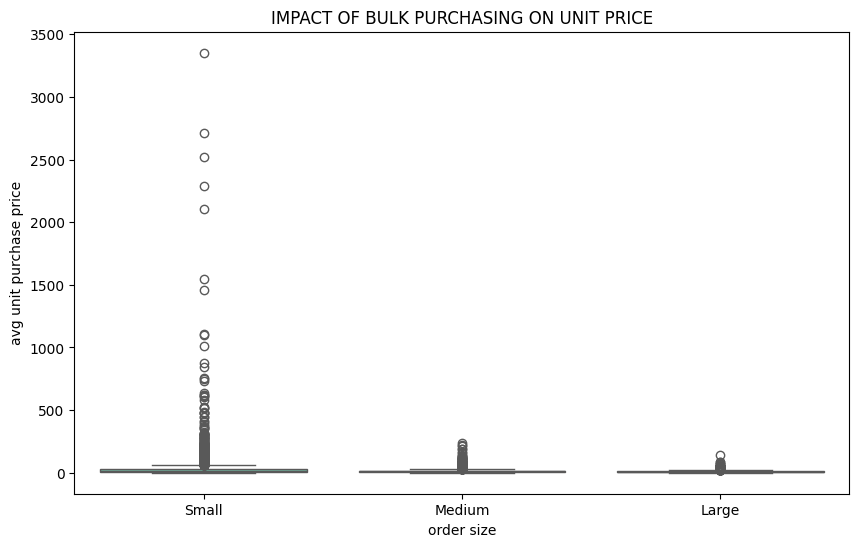

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df , x = "OrderSize", y = "UnitPurchasePrice" , palette="Set2")
plt.title("IMPACT OF BULK PURCHASING ON UNIT PRICE")
plt.xlabel("order size")
plt.ylabel("avg unit purchase price")
plt.show()

* Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
* The price difference between Small and Large orders is substantial (-72% reduction in unit cost)
* This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

vendors having low inventory , indicating excess stock and slow - moving product 

In [38]:
df[df['StockTurnOver']<1].groupby('VendorName')[['StockTurnOver']].mean().sort_values('StockTurnOver' , ascending=True).head(10)

,StockTurnOver
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


###  how much capital is locked in inventory per vendor and which contribute most to it 


In [42]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity']-df['TotalSalesQuantity'])*df['PurchasePrice']
print('total unsold captial' , format_dollars(df['UnsoldInventoryValue'].sum()))

total unsold captial 2.71M


In [46]:
#aggregated value locked per vendor 
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue" , ascending=False)

inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
69,PERNOD RICARD USA,470.63K
117,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
80,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
62,MOET HENNESSY USA INC,126.48K
78,REMY COINTREAU USA INC,118.60K


### what is 95 % confidence interval for top performing and low performing verndors 

In [10]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [11]:
top_vendors = df[df['TotalSalesDollars']>= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars']<=low_threshold]['ProfitMargin'].dropna()

In [12]:
low_vendors

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8560    83.448276
8561    96.436186
8562    25.252525
8563    98.974037
8564    99.166079
Name: ProfitMargin, Length: 2142, dtype: float64

In [13]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


In [14]:
top_mean , top_lower , top_upper = confidence_interval(top_vendors)
low_mean , low_lower , low_upper = confidence_interval(low_vendors)

print({f"top vendors  CI({top_lower:.2f} ,{top_upper:.2f} ) , Mean:{top_mean:.2f}"})
print({f"low vendors CI({low_lower:.2f} ,{low_upper:.2f} ) , Mean:{low_mean:.2f}"})

{'top vendors  CI(30.74 ,31.61 ) , Mean:31.17'}
{'low vendors CI(40.48 ,42.62 ) , Mean:41.55'}


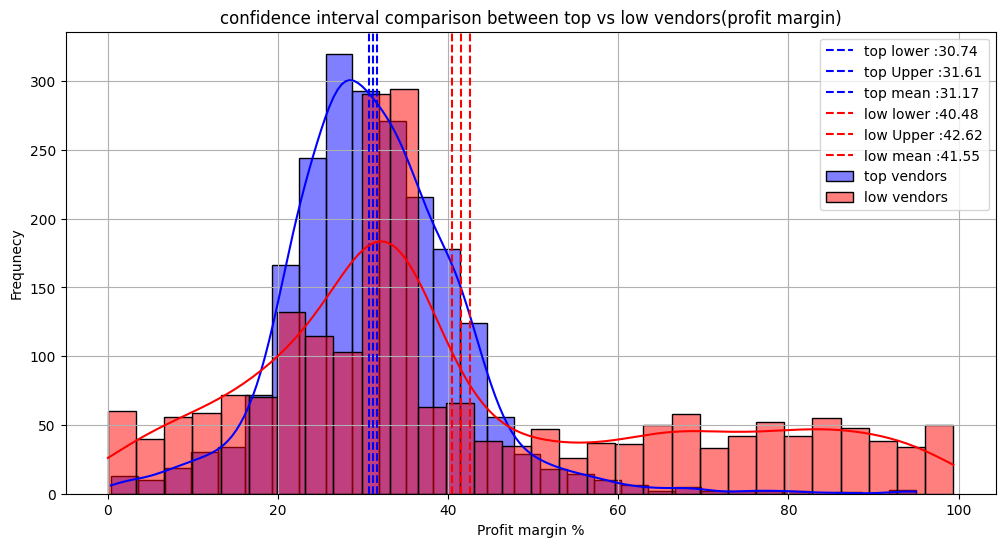

In [15]:
plt.figure(figsize=(12,6))

# top vendor plt
sns.histplot(top_vendors , kde= True , color="blue" , bins=30 , alpha = 0.5, label = "top vendors")
plt.axvline(top_lower , color = "blue" , linestyle = "--" , label = f"top lower :{top_lower:.2f}")
plt.axvline(top_upper, color = "blue" , linestyle = "--" , label = f"top Upper :{top_upper:.2f}")
plt.axvline(top_mean, color = "blue" , linestyle = "--" , label = f"top mean :{top_mean:.2f}")


# low vendor plt
sns.histplot(low_vendors , kde= True , color="red" , bins=30 , alpha = 0.5, label = "low vendors")
plt.axvline(low_lower , color = "red" , linestyle = "--" , label = f"low lower :{low_lower:.2f}")
plt.axvline(low_upper, color = "red" , linestyle = "--" , label = f"low Upper :{low_upper:.2f}")
plt.axvline(low_mean, color = "red" , linestyle = "--" , label = f"low mean :{low_mean:.2f}")

plt.title("confidence interval comparison between top vs low vendors(profit margin)")
plt.xlabel("Profit margin %")
plt.ylabel("Frequnecy")
plt.legend()
plt.grid(True)
plt.show()
